### Importation des modules nécessaires

In [23]:
#Importation des modules
%matplotlib inline
%pip install sounddevice
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

Note: you may need to restart the kernel to use updated packages.


# Émission

In [24]:
#Ecriture du message de l'Agent
Message = str(input('Entrez le message à envoyer : '))

Entrez le message à envoyer : SALUTATION


### Conversion du message texte en binaire via la table ASCII

In [25]:
#Conversion du message texte en binaire via la table ASCII
total_binary='' #Création liste total_binary
for i in range(len(Message)):
    binary=''   #Création liste binary
    string_ord = ord(Message[i])  #Renvoie le décimal correspondant à chaque caratère de la chaîne de caractère
    while string_ord>0:   #Boucle tant qu'il y a un caractère
        x = string_ord % 2
        string_ord = string_ord // 2
        binary = str(x) + str(binary)
    total_binary += binary

print(total_binary)

1010011100000110011001010101101010010000011010100100100110011111001110


### Encodage CRC

In [26]:
#Définition de la fonction XOR utilisée pour la division
def xor(a,b):
    resultat = [] #Initialisation du résultat
    for i in range(1,len(b)): #Boucle pour appliquer la fonction XOR (si les bits sont les même, alors XOR vaut 0, sinon XOR vaut 1)
        if a[i]== b[i]:
            resultat.append('0')
        else:
            resultat.append('1')
    return ''.join(resultat) #On retourne les données de la fonction XOR sous forme d'une chaîne de caractères

#Définition de la fonction division euclidienne
def Division_eucl(divident,diviseur):
    val = len(diviseur)
    tmp = divident[0 : val]
    while val<len(divident):
        if tmp[0]=='1':
            tmp = xor(diviseur, tmp)+divident[val]
        else:
            tmp = xor('0'*val, tmp)+divident[val]
        val+=1
    if tmp[0]=='1':
        tmp = xor(divisor, tmp)
    else:
        tmp = xor('0'*val, tmp)
    check = tmp
    return check

#Définition de la fonction d'encodage CRC (total_binary + 'N-bits 0', G (la clé/polynom générateur))
def encodage(data, key):
    length_key = len(key)
    data_ajout = data + '0'*(length_key-1)
    reste = Division_eucl(data_ajout, key)
    data_encode = data + reste
    return data_encode

#Fonction Main
data = total_binary + '00000'
key = '11010'
print("Les données à envoyer sont :", data)
print("La clé CRC est:", key)

data_crc = encodage(data,key)
print("Les données encodées avec la clé key sont :", data_crc)

Les données à envoyer sont : 101001110000011001100101010110101001000001101010010010011001111100111000000
La clé CRC est: 11010
Les données encodées avec la clé key sont : 1010011100000110011001010101101010010000011010100100100110011111001110000001000


In [27]:
#Implantation de l'octet de définition de la trame?


### Codage Manchester

In [28]:
message_bool = []
for i in range(0,len(data_crc),1):
    if data_crc[i]=='1':
        message_bool.append(True)
    if data_crc[i]=='0':
        message_bool.append(False)
print(message_bool)
#Codage Manchester du message
message_code=[]
for ii in range(0,len(message_bool)):
    if message_bool[ii]==True:
        message_code.extend([int(1)])
        message_code.extend([int(0)])
    if message_bool[ii]==False:
        message_code.extend([int(0)])
        message_code.extend([int(1)])

[True, False, True, False, False, True, True, True, False, False, False, False, False, True, True, False, False, True, True, False, False, True, False, True, False, True, False, True, True, False, True, False, True, False, False, True, False, False, False, False, False, True, True, False, True, False, True, False, False, True, False, False, True, False, False, True, True, False, False, True, True, True, True, True, False, False, True, True, True, False, False, False, False, False, False, True, False, False, False]


### Modulation ASK

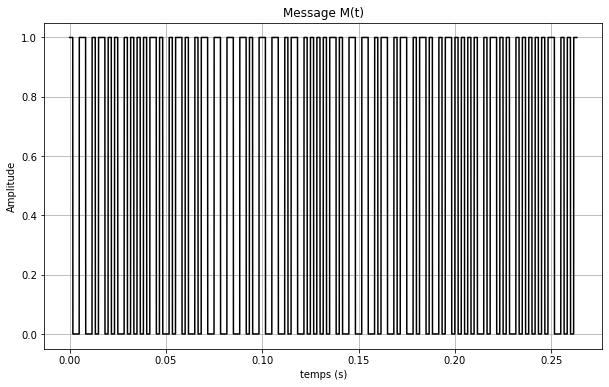

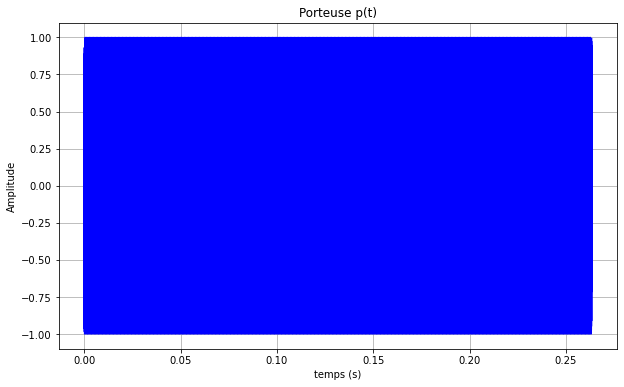

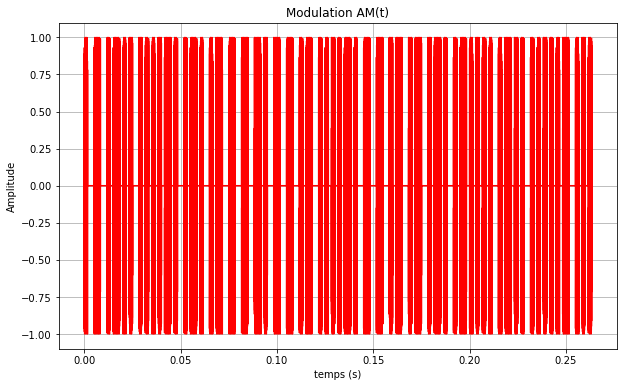

In [29]:
#Modulation ASK du message
M = message_code
Fe = 88200
Fp = 35000
baud = 600
Nbits = len(M)
Ns = Fe/baud
N = Nbits*Ns

#On génère le message binaire dupliqué
M_duplique=np.repeat(M,Ns)

#On génère le vecteur temps
t = np.arange (0.0,N)/Fe

#On génère la porteuse P(t)
Ap=1
Porteuse = Ap*np.sin(2*np.pi*Fp*t)

#On réalise la modulation en amplitude (ASK)
ASK = Porteuse*M_duplique


#Affichage Message binaire, Porteuse et modulation
plt.figure (figsize = (10,6))
plt.plot(t,M_duplique,'Black')
plt.title('Message M(t)')
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.grid()

plt.figure (figsize = (10,6))
plt.plot(t,Porteuse,'b')
plt.title('Porteuse p(t)')
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.grid()

plt.figure (figsize = (10,6))
plt.plot(t,ASK,'r')
plt.title('Modulation AM(t)')
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.grid()

### Modulation FSK (module supplémentaire optionnel)

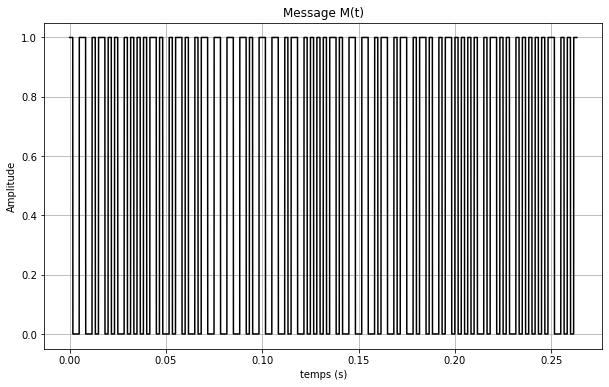

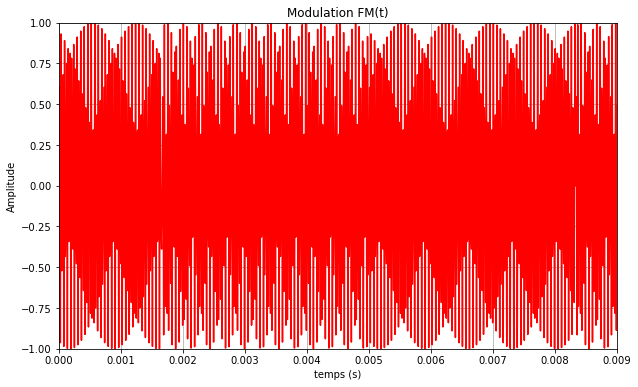

In [30]:
#Modulation FSK

# On génère le message binaire dupliqué
M_duplique = np.repeat(M,Ns) 

#On génère le vecteur temps
t = np.arange (0.0,N)/Fe

# Génération des 2 porteuse P1 pour le bit 1 et P2 pour le bit 0
A1 =  1                                        
A2 =  1                  
fp1 =  35000                
fp2 =  36000 
P1 =  A1*np.sin(2*np.pi*fp1*t)                 
P2 =  A2*np.sin(2*np.pi*fp2*t)

FSK=[P1[i] if M_duplique[i]==1 else P2[i] for i in range(len(M_duplique))]

#Affichage du message
plt.figure (figsize = (10,6))
plt.plot(t,M_duplique,'Black')
plt.title('Message M(t)')
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.grid()

#Affichage du signal modulé
plt.figure (figsize = (10,6))
plt.plot(t,FSK,'r')
plt.title('Modulation FM(t)')
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.axis([0,0.009,-1,1])
plt.grid()

### Émission du message sous forme de son

In [48]:
#Émission du message sous forme de signal (Jouer le son)
sd.play(ASK, Fe)

# Réception

### Démodulation FSK (module supplémentaire optionnel)

In [32]:
#démodulation FSK du signal
Fp1 = 35000
Fp2 = 36000
S1 = np.sin(2*np.pi*Fp1*t)
S2 = np.sin(2*np.pi*Fp2*t) 

Produit1 = S1*FSK
Produit2 = S2*FSK

Res1=[]
Res2=[]

i=0
for i in range(0,int(N),int(Ns)):
    Res1.append(np.trapz(Produit1[i:i+int(Ns)]))
    Res2.append(np.trapz(Produit2[i:i+int(Ns)]))

y=[]
for i in range(0,len(Res1)):
    if Res1[i]>Res2[i]:
        y.append(1)
    if Res1[i]<Res2[i]:
        y.append(0)

### Décodage Manchester (module supplémentaire optionnel)

In [33]:
#Décodage Manchester
message_demodule = np.array(y)>0

message_recu_decode=[]
for iii in range(0,len(message_demodule)):
    if message_demodule[iii]==True:
        message_recu_decode.extend([int(1)])
    if message_demodule[iii]==False:
        message_recu_decode.extend([int(0)])

message_recu_bin=[]
for iiii in range(0, len(message_demodule),2):
    if message_recu_decode[iiii]==1 and message_recu_decode[iiii+1]==0:
        message_recu_bin.extend([str(1)])
    if message_recu_decode[iiii]==0 and message_recu_decode[iiii+1]==1:
        message_recu_bin.extend([str(0)])
print(message_recu_bin)

['1', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0']


### Démodulation ASK

[ 0.          0.60380441 -0.96262425 ...  0.14904227 -0.71586685
  0.99223921]


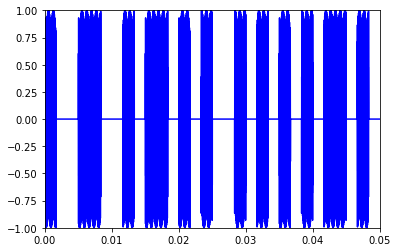

In [34]:
#Démodulation ASK du signal
Fe = 88200
Fp = 35000
baud = 600
N = len(ASK)
Ns = Fe/baud

t = np.arange (0.0,N)/Fe

Porteuse=np.sin(2*np.pi*Fp*t)
Produit=ASK*Porteuse

#Intégration
y=[]
for i in range(0,int(N),int(Ns)):
    y.append(np.trapz(Produit[i:i+int(Ns)],t[i:i+int(Ns)]))

plt.plot(t,ASK,'b')
plt.axis([0,0.05,-1,1])
print(ASK)

### Décodage Manchester

In [35]:
#Décodage Manchester
message_demodule = np.array(y)>0

message_recu_decode=[]
for iii in range(0,len(message_demodule)):
    if message_demodule[iii]==True:
        message_recu_decode.extend([int(1)])
    if message_demodule[iii]==False:
        message_recu_decode.extend([int(0)])

message_recu_bin=[]
for iiii in range(0, len(message_demodule),2):
    if message_recu_decode[iiii]==1 and message_recu_decode[iiii+1]==0:
        message_recu_bin.extend([str(1)])
    if message_recu_decode[iiii]==0 and message_recu_decode[iiii+1]==1:
        message_recu_bin.extend([str(0)])
print(message_recu_bin)

['1', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0']


### Conversion de la liste en chaîne de caractère pour les étapes suivantes

In [36]:
#conversion liste en chaine de caractère
message_réceptionné=''.join(message_recu_bin)
print(message_réceptionné)

1010011100000110011001010101101010010000011010100100100110011111001110000001000


### Décodage CRC et vérification d'erreur

In [38]:
#Définition de la fonction de décodage
def decodage(data_crc, key):
    length_key = len(key)
    data_ajout = data_crc + '0'*(length_key-1)
    reste = Division_eucl(data_ajout, key)
    return reste

key = '11010'
check = decodage(message_réceptionné, key)                      #Récupération du reste de la division euclidienne du message réceptionné par la clé
print("Le reste de la division après décodage est ->" +check)
temp = "0" * (len(key) - 1)                                     #Récupération du message de base
if check == temp:
    print("Les données -> "+data +"<- sont bien reçues!")
else:
    print("Erreur de réception")

Le reste de la division après décodage est ->0000
Les données -> 101001110000011001100101010110101001000001101010010010011001111100111000000<- sont bien reçues!


### Conversion du message binaire en texte via la table ASCII

In [51]:
#Définition de la fonction de conversion du binaire en décimale
def BinaryToDecimal(binary):  
    #initialisation des variables
    decimal = 0
    i = 0
    n = 0
    while(binary != 0): 
        dec = binary % 10
        decimal = decimal + dec * pow(2, i) 
        binary = binary//10
        i += 1
    return (decimal)

#Conversion du message binaire en texte via la table ASCII
Total_texte=''
for i in range(0,len(message_réceptionné),7):
    bin_data=int(message_réceptionné[i:i+7])
    decimal_data = BinaryToDecimal(bin_data)
    Total_texte = Total_texte + chr(decimal_data)

### Affichage du message

In [44]:
#Affichage du message
print(Total_texte)

SALUTATION 


### Accusé de réception (module supplémentaire optionnel)

In [47]:
verification = int(check,2)
FeA=44100
t=np.arange(0,0.2,1/FeA)
Accusé_réception=np.sin(2*np.pi*5000*t)
if verification == 0:
    sd.play(Accusé_réception, FeA)   #Émission du message sous forme de signal (Jouer le son)